### <b>preparation for Score_human_vs_crest_lines.ipynb</b>

In [1]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from Display import Plot_2D
from operator import itemgetter
from PIL import Image, ImageOps
from DualColor import binary
import pickle 
import AfterCrestLines
import importlib as imp

In [2]:
project_name = 'TGB_mesh_n=7_depth=11'
thin = 0.1
margin = 2 # extra padding
plotter = Plot_2D(init_color='black', warp_color='white', thickness=thin)

In [3]:
imp.reload(AfterCrestLines)
where_crest_lines = {
    'mesh': {
        'filename': f"{project_name}_ravines.txt",},   
}
crest_lines = []
AfterCrestLines.undo_centering(['mesh'], crest_lines, [4.37392254e+05, 1.43946825e+07, 1.95543722e+03],
    name_to_filename_dictionary=where_crest_lines)
gpd.options.display_precision = 6
crest_lines_frame = gpd.GeoDataFrame(data={'geometry': crest_lines}, crs="EPSG:4326")

working on: main mound left
filename: .//main_mound_left_k=6_ravines.txt
we got: 
	795352 points, 
	706358 lines


In [4]:
drawn_frame = gpd.read_file('./drawn_lines/drawn_lines.shp')
drawn_frame.head()

,Shape_Leng,geometry
0,15.409228,"LINESTRING (437045.606600 14395030.971000, 437..."
1,6.492099,"LINESTRING (437046.000500 14395033.071700, 437..."
2,5.345269,"LINESTRING (437047.444800 14395029.132800, 437..."
3,33.762019,"LINESTRING (437020.528800 14395022.830500, 437..."
4,16.079257,"LINESTRING (437003.460100 14395028.607600, 437..."


In [5]:
# https://gis.stackexchange.com/questions/402879/obtain-min-and-max-lat-long-for-all-geometries-using-geopandas
bounds = drawn_frame.geometry.apply(lambda x: x.bounds).tolist()
minx, miny, maxx, maxy = min(bounds, key=itemgetter(0))[0], min(bounds, key=itemgetter(1))[1], max(bounds, key=itemgetter(2))[2], max(bounds, key=itemgetter(3))[3]

In [6]:
boundary_information : dict[str, tuple[float, float]]= {}
boundary_information['tight x range'] = (minx, maxx)
boundary_information['tight y range'] = (miny, maxy)
display_minx = minx - margin
display_maxx = maxx + margin
display_miny = miny - margin
display_maxy = maxy + margin
boundary_information['display x range'] = (display_minx, display_maxx)
boundary_information['display y range'] = (display_miny, display_maxy)
with open(f'{project_name}_boundary_information.pkl', 'wb') as f:
    pickle.dump(boundary_information, f)
boundary_information    

{'tight x range': (436997.15780000016, 437210.1308999993),
 'tight y range': (14394986.7236, 14395085.9019),
 'display x range': (436995.15780000016, 437212.1308999993),
 'display y range': (14394984.7236, 14395087.9019)}

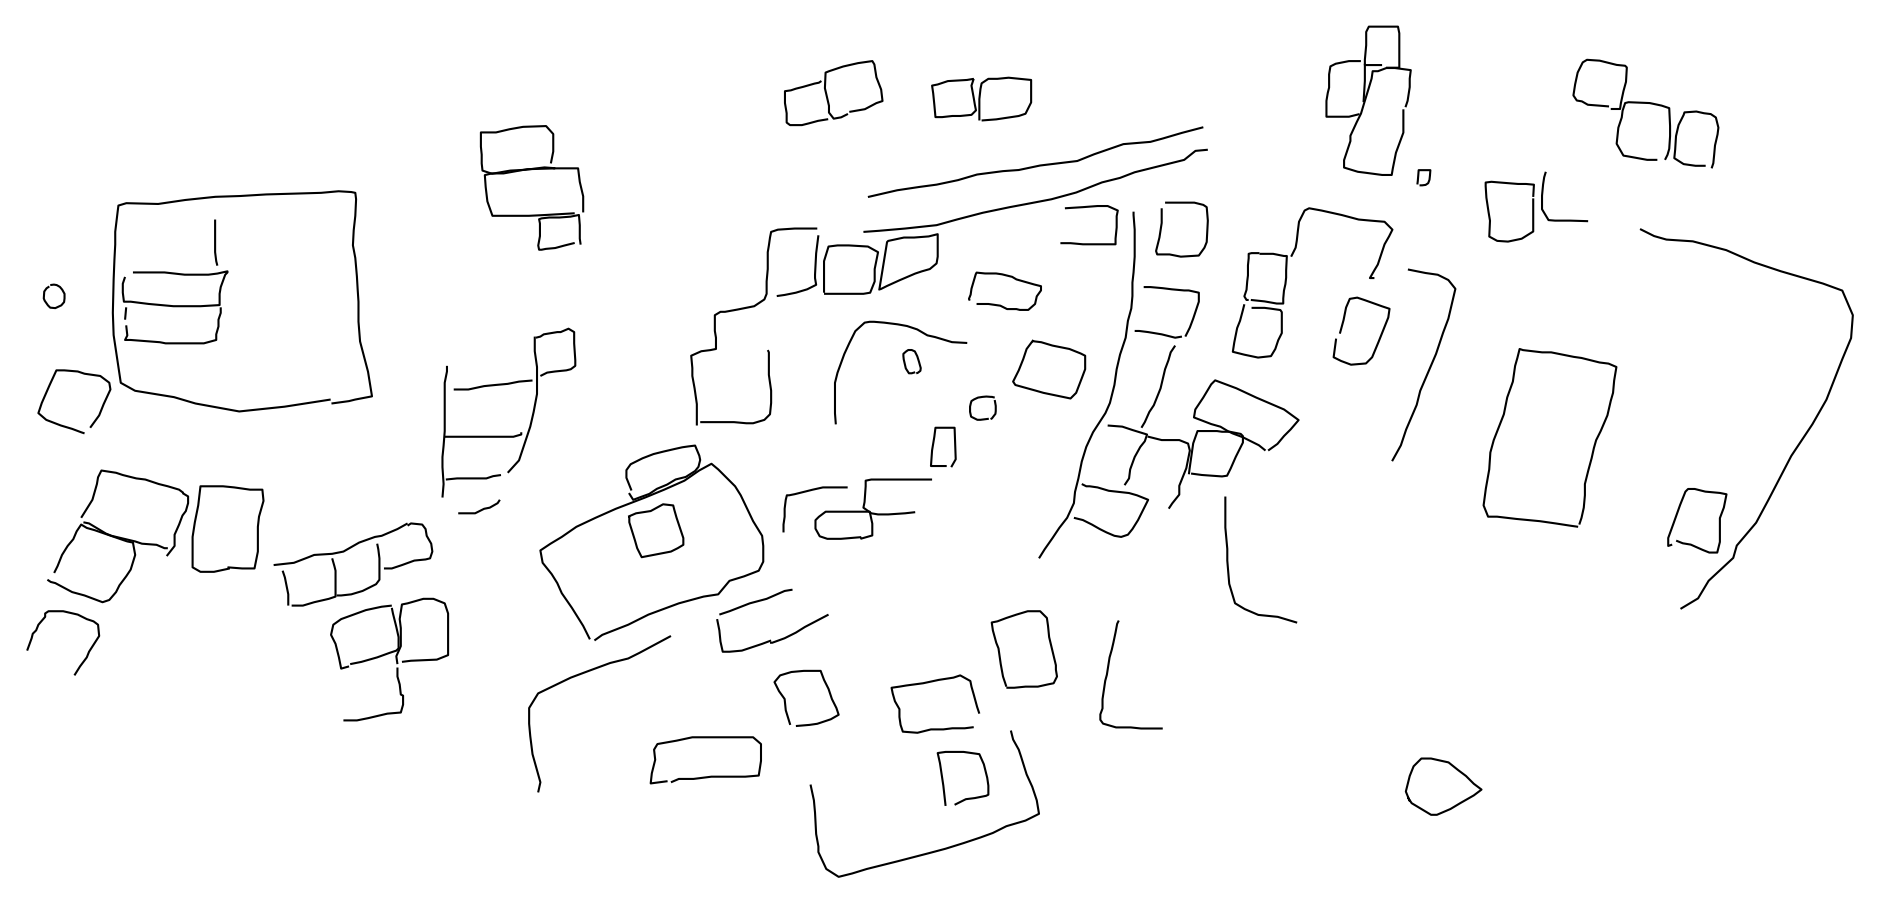

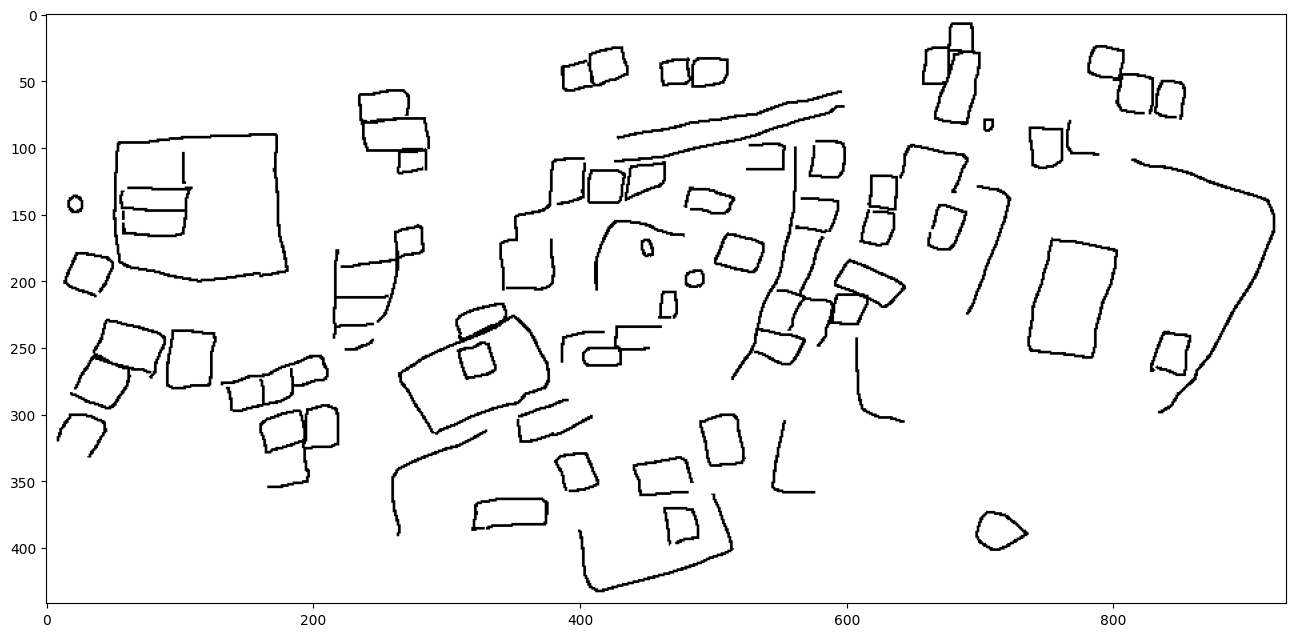

In [7]:
f, ax = plt.subplots(figsize=(24, 16))
ax.set_xlim(xmin=display_minx, xmax=display_maxx)
ax.set_ylim(ymin=display_miny, ymax=display_maxy)
drawn_frame.plot(aspect=1, color='black', ax=ax)
# crest_lines_frame.plot(aspect=1, color='red', ax=ax)
import matplotlib.patches as patches
ax.set_axis_off()
# https://stackoverflow.com/questions/37435369/how-to-draw-a-rectangle-on-image
# box_display = patches.Rectangle((minx, miny), (maxx-minx), (maxy-miny), linewidth=10, edgecolor='r', facecolor='none')
# ax.add_patch(box_display)
box = ax.get_tightbbox(renderer=None)
plt.gcf().savefig("drawn.png", bbox_inches='tight', dpi=50, pad_inches=0, 
                  facecolor=f.get_facecolor())
mask_image = Image.open("drawn.png")

mask, _ = binary(255 - np.asarray(ImageOps.grayscale(mask_image)), 0, [255, 255, 255], [0, 0, 0])
# f, ax = plt.subplots(figsize=(16, 16))
# ax.imshow(np.asarray(ImageOps.grayscale(mask_image)))
np.savetxt(fname=f'{project_name}_drawn_mask.txt', X=mask, fmt='%i')
drawn_mask = np.loadtxt(f"{project_name}_drawn_mask.txt")
f, ax = plt.subplots(figsize=(16, 16))
ax.imshow(1 - drawn_mask, cmap='gray')

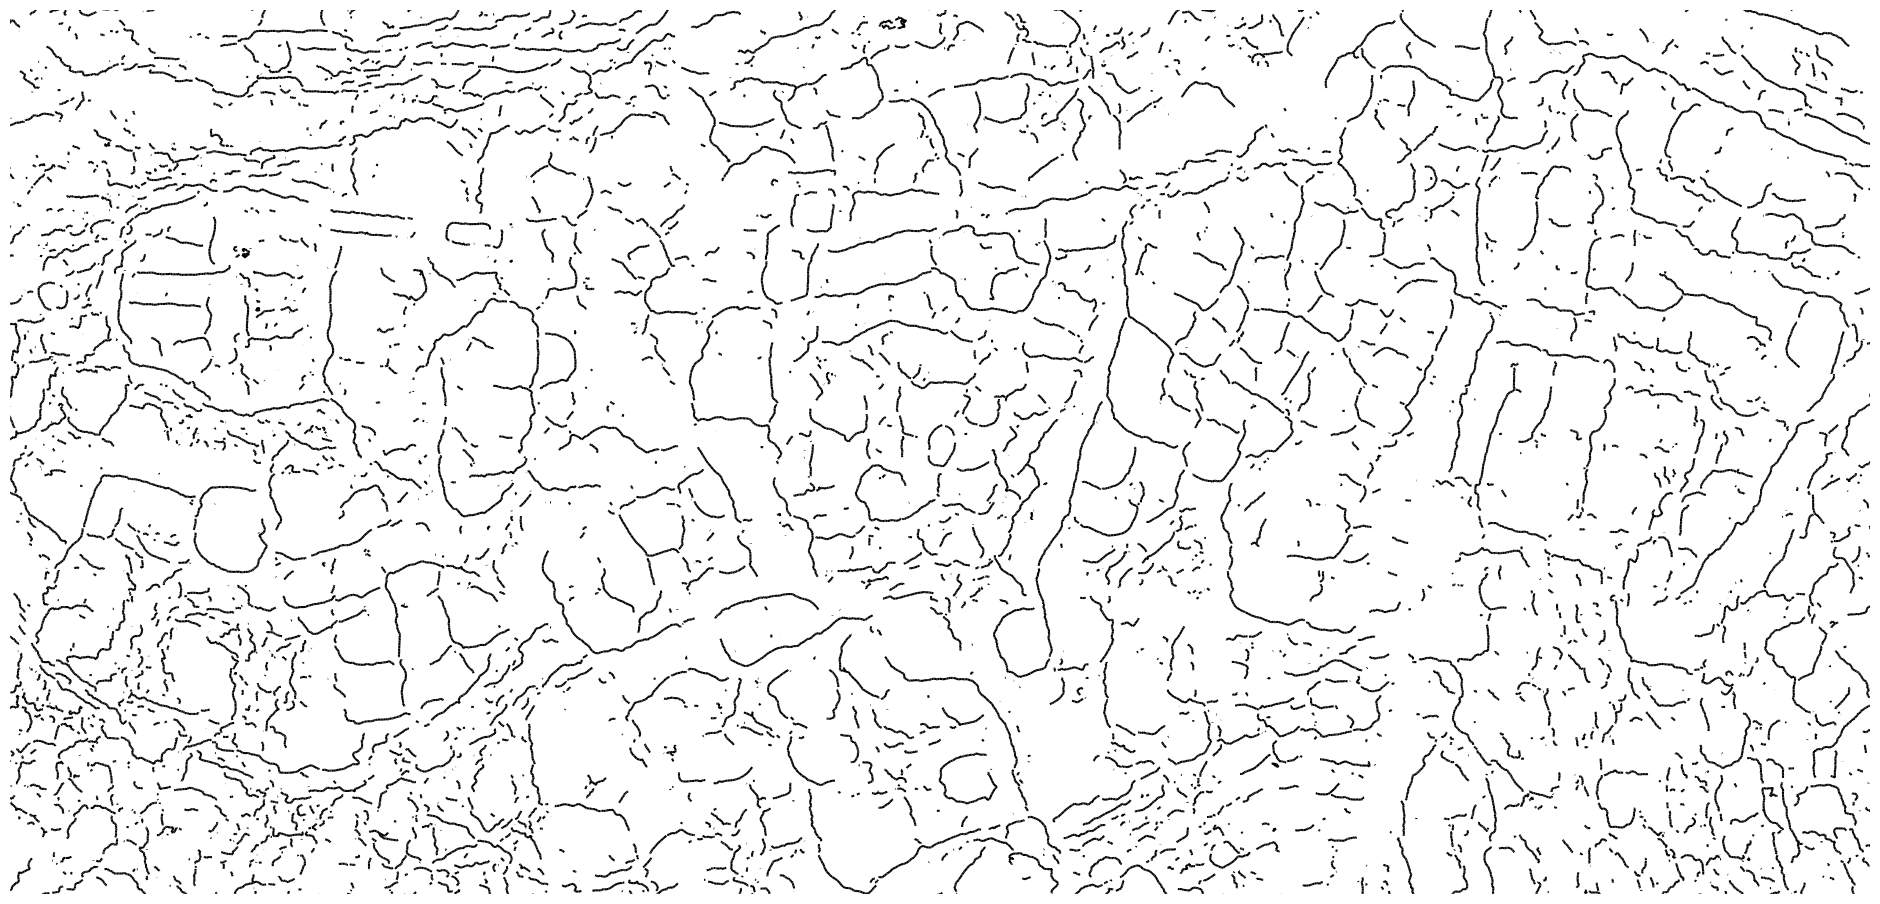

In [8]:
f, ax = plt.subplots(figsize=(24, 16))
margin = 2
ax.set_xlim(xmin=minx - margin, xmax=maxx + margin)
ax.set_ylim(ymin=miny - margin, ymax=maxy + margin)
# drawn_frame.plot(aspect=1, color='red', ax=ax)
crest_lines_frame.plot(aspect=1, color='black', ax=ax)
import matplotlib.patches as patches
ax.set_axis_off()
# box_display = patches.Rectangle((minx, miny), (maxx-minx), (maxy-miny), linewidth=10, edgecolor='r', facecolor='none')
# ax.add_patch(box_display)
box = ax.get_tightbbox(renderer=None)
plt.gcf().savefig("crestline.png", bbox_inches='tight', dpi=50, pad_inches=0, 
                  facecolor=f.get_facecolor())
mask_image = Image.open("crestline.png")
mask, _ = binary(255 - np.asarray(ImageOps.grayscale(mask_image)), 0, [255, 255, 255], [0, 0, 0])
np.savetxt(fname=f'{project_name}_crestline_mask.txt', X=mask, fmt='%i')